In [1]:
from functions import *
import matplotlib.pyplot as plt

In [2]:
# set epsilon
epsilon = 1.0e-16

data = []

for i in range(17):
    A = np.array([[1, 1, 1], [epsilon, 0, 0], [0, epsilon, 0], [0, 0,
                                                                epsilon]])

    Q_CGS, R_CGS = CGS_QR(A)
    Q_MGS, R_MGS = MGS_QR(A)

    # Call HQR
    A_out, t_out = HQR(A)
    # Form Q
    Q_HQR = FormQ(A_out, t_out)

    data.append([
        epsilon,
        np.linalg.norm(np.identity(3) - np.dot(np.transpose(Q_CGS), Q_CGS)),
        np.linalg.norm(np.identity(3) - np.dot(np.transpose(Q_MGS), Q_MGS)),
        np.linalg.norm(np.identity(3) - np.dot(np.transpose(Q_HQR), Q_HQR))
    ])

    epsilon = epsilon * 10

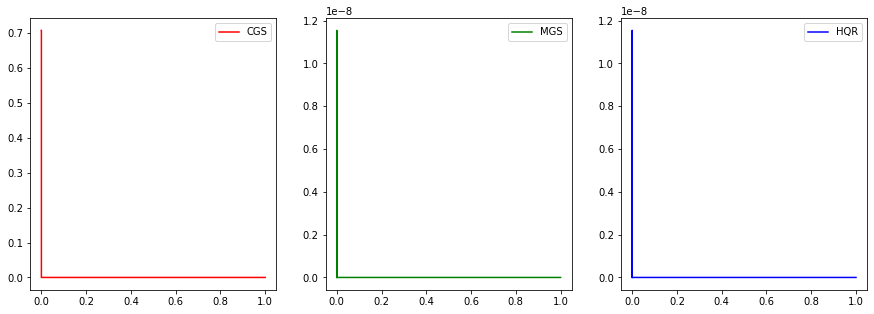

In [3]:
data = np.array(data)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(data[:, 0], data[:, 1], 'r', label="CGS")
plt.legend()
plt.subplot(132)
plt.plot(data[:, 0], data[:, 2], 'g', label="MGS")
plt.legend()
plt.subplot(133)
plt.plot(data[:, 0], data[:, 2], 'b', label="HQR")
plt.legend()
plt.show()